<div align="center">

# Principal Component Analysis (PCA)

#### An introduction to machine learning

</div>

`PCA` or `Principal Component Analysis` is a dimansionality reduction technique that is used to reduce the number of features in a dataset. It's a very powerful technique that is used in many fields such as image processing, computer vision, and many others.

In this notebook, I will explain the concept of PCA and how it works. I will also show how to implement PCA using Python and the `scikit-learn` library. For more articles and content, you can follow me on:

- LinkedIn:https://www.linkedin.com/in/md-rishat-talukder-a22157239/
- gitub: https://github.com/RishatTalukder/learning_machine_learning/tree/main
- Youtube: https://www.youtube.com/channel/UCEEkKXpAkSwcMaIHnGi3Niw



# PCA or Principal Component Analysis?

`PCA` or `Principal Component Analysis` is a statistical technique that is used to `reduce the number of features` in a dataset. It does so by transforming the features into a new set of features called `principal components`. Before going into the details of PCA, let's first understand the concept of `dimensionality reduction`.

## What is Dimensionality Reduction?

`Dimensionality reduction` is the process of reducing the number of features in a dataset. It is a very important technique in machine learning because it helps in reducing the `complexity` of the model and also helps in `avoiding overfitting`. There are two types of `dimensionality reduction` techniques:

1. `Feature Selection`.
2. `Feature Extraction`.

`Feature Selection` is the process of `selecting a subset of features` from the original set of features. It is a very simple technique and is used when the number of features is not very large. 

`Feature Extraction` is the process of `transforming the original set of features` into a new set of features. It is a more complex technique and is used when the number of features is very large. `PCA` is a `feature extraction` technique.

## What is PCA?

Suppose you have a dataset with `10` features and you want to use `any machine learning algorithm` to make `predictions`. The first thing you will do is to `train` the model using the dataset. 

Let's say we will apply `linear regression` to the dataset. The `linear regression` model will try to find the `best fit line` that will `minimize` the `error` between the `actual` and `predicted` values.

Now, you might think that's it? No, it's not. The `linear regression` model will try to find the `best fit line` in a **10-dimensional space**. This means that the model will try to find the `best fit line` in a space that has `10` dimensions. We cannot even think of a dimension that has more than `3` dimensions. So, how can we visualize a `10-dimensional space`? It's complecated, right?

But Mathematically, it's possible. But it's very `complex` and `difficult` to understand the linear regression model in a `10-dimensional space` and also to `visualize` it. This is where `PCA` comes into play.

`PCA` is a `feature extraction` technique that is used to `transform` the original set of features into a new set of features called `principal components`. These `principal components` are `linear combinations` of the original set of features. The `first principal component` will have the `maximum variance` and the `second principal component` will have the `second maximum variance` and so on.

> Variance is a measure of the `spread` of the data. It tells us how much the data is `spread` out from the `mean`.
> maximum variance means the data is `spread` out the most.

I'll not go into details of what `bias` and `variance` are, I will leave it as a task for you to find out. 

SO, `PCA` will `transform` the original set of `10 features` into a new set of `n features` where `n` is less the number of `components` you want to keep. SO, if we choose `n=2`, then `PCA` will transform the original set of `10 features` into a new set of `2 features`. This means that we can now `visualize` the `linear regression` model in a `2-dimensional space` which is very easy to understand and visualize.

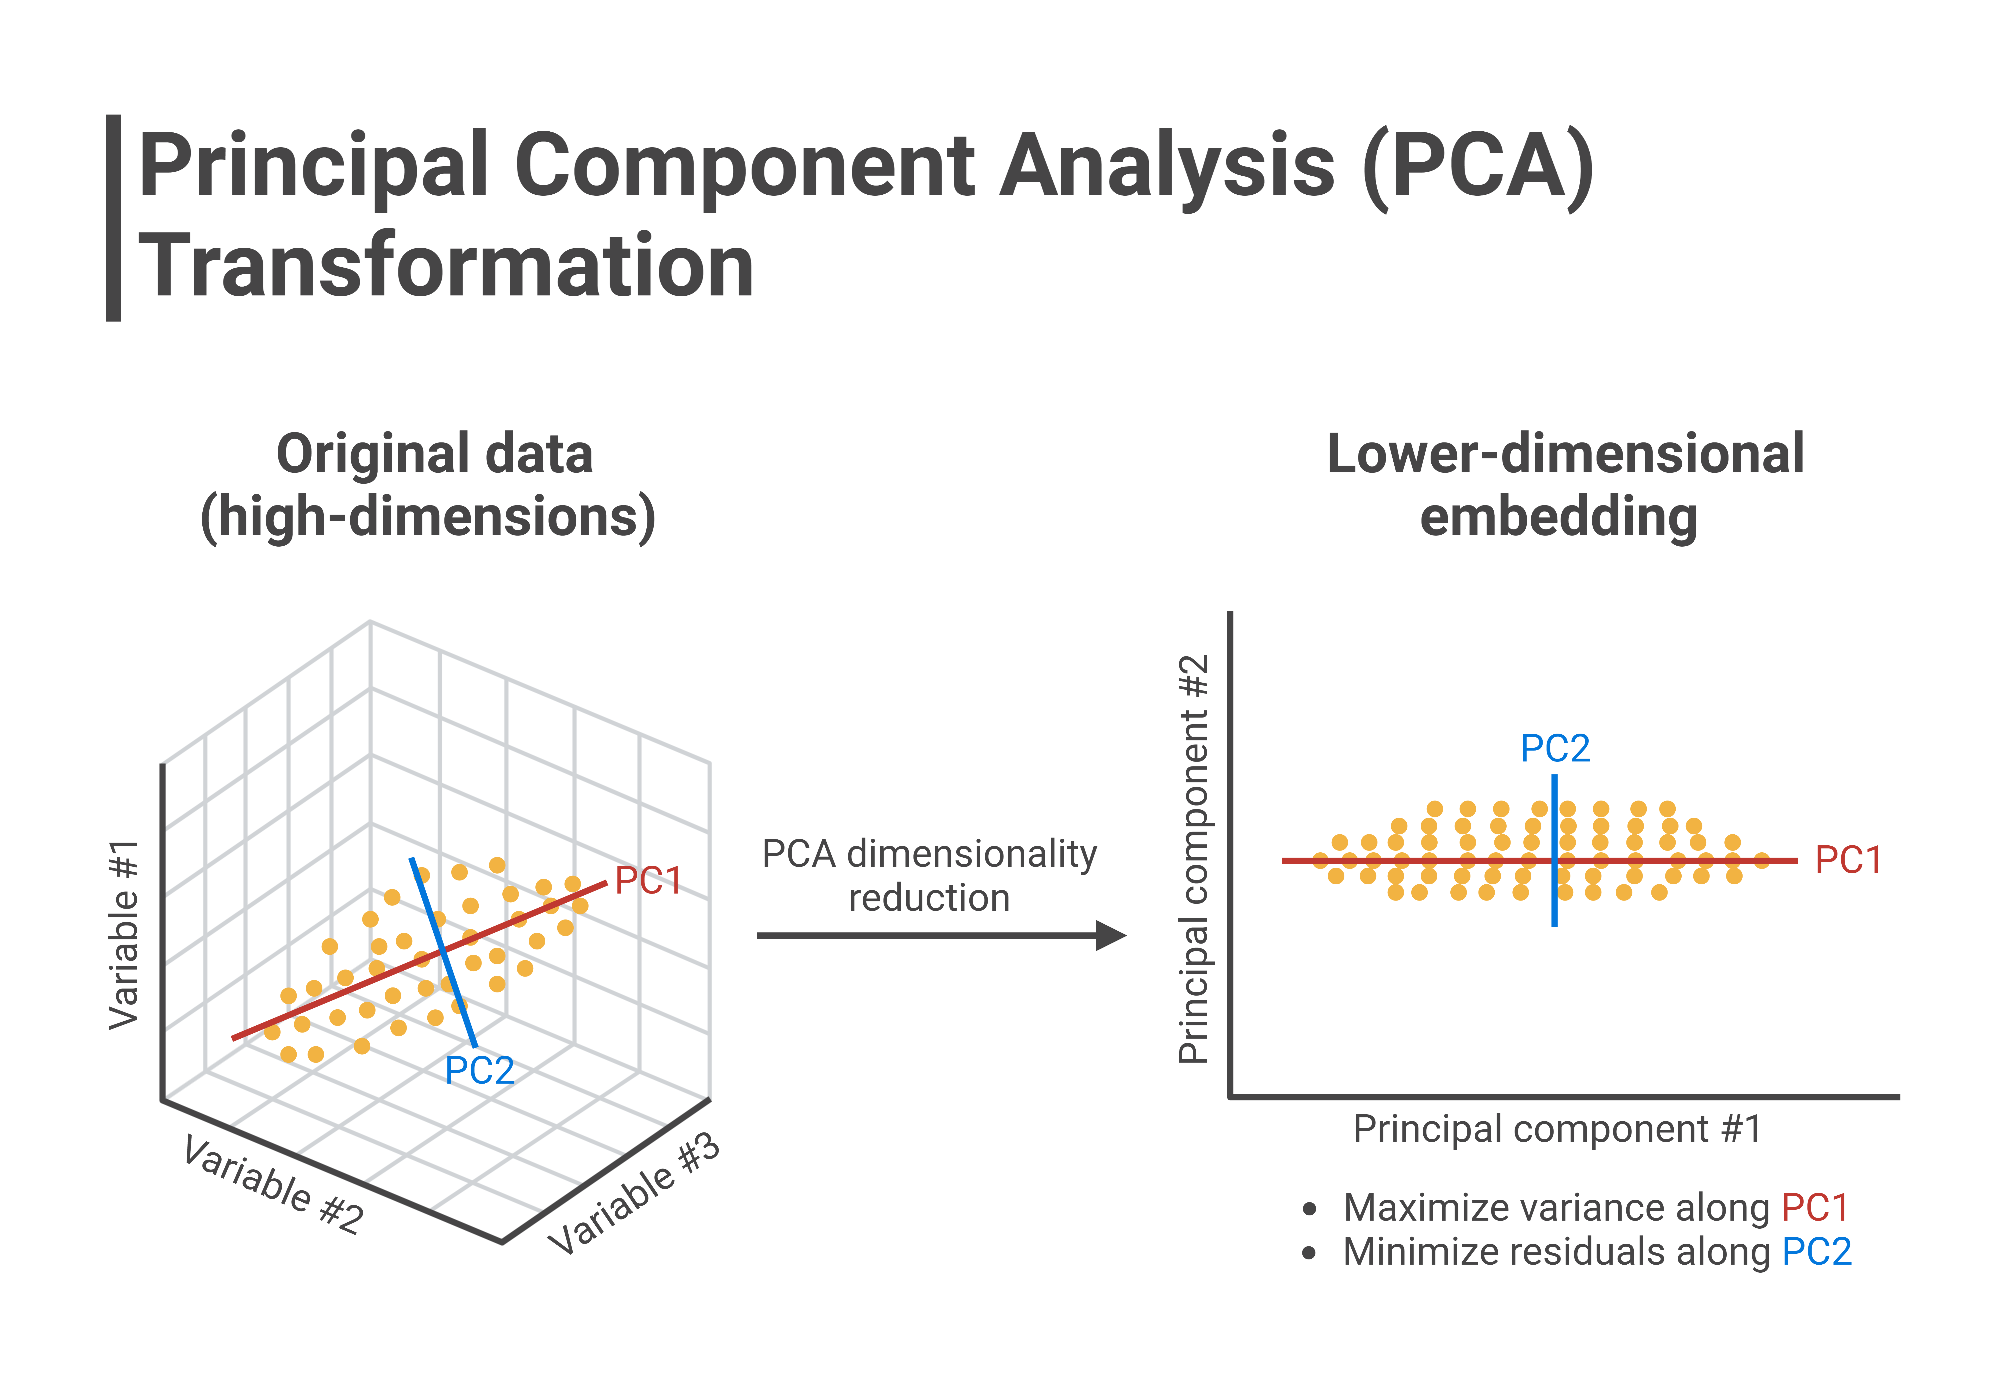


Now let's see how `PCA` works and how to implement it using Python and the `scikit-learn` library.

# Implementing PCA using Python and scikit-learn

First of all I'll use `breast cancer` dataset from the `scikit-learn` library. This dataset has `30` features and `1` target variable. I'll use `PCA` to reduce the number of features from `30` to `2` and Try to visualize the `linear regression` model in a `2-dimensional space`.

Let's start by importing the necessary libraries and the dataset.

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Now, we can import the dataset

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


AS you can see the dataset in not a pandas dataframe. It's a `Bunch` object. We can convert it into a pandas dataframe using the `pd.DataFrame` method but we can see that the data is stored as `key-value` pairs. And we have `8` keys that has the `data`, `target`, `target_names`, `DESCR`, `feature_names`, `filename`, `data_module` and `frame`. We can use the `data` and `target` keys to create a pandas dataframe and the feature names as the column names.

But first let's see the description of the dataset using the `DESCR` key.

In [22]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Well here you can see that the dataset has `569` samples and `30` features.

In [23]:
print(cancer['target_names'])

['malignant' 'benign']


And we can also see that the dataset has `2` classes. `malignant` and `benign`.

Now as we have 30 features, we cannot visualize the dataset in a 30-dimensional space. So, we will use `PCA` to reduce the number of features from `30` to `2` and then visualize the dataset in a `2-dimensional space`.

But first let's make a proper dataset using the `data` and `target` keys.

In [24]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


There you go. Now we have a proper dataset with `30` features. Now we can use `PCA` to reduce the number of features from `30` to `2`.


## Standardizing the dataset

Before applying `PCA` to the dataset, we need to `standardize` the dataset. `Standardizing` the dataset means `scaling` the dataset so that each feature has a `mean` of `0` and a `standard deviation` of `1`. This is very important because `PCA` is a `variance-based` technique and it requires the features to be `standardized`.

We need to `standardize` the dataset because the `features` are in `different scales`. Some features might have a `large scale` and some might have a `small scale`. This will cause the `PCA` to give more importance to the features with a `large scale` and less importance to the features with a `small scale`. So, we need to `standardize` the dataset so that all the features have the `same scale`.


SO, this will be the first step in `PCA`. We will `standardize` the dataset and then apply `PCA` to the `standardized` dataset.

In [25]:
from sklearn.preprocessing import StandardScaler

#make a scaler object
scaler = StandardScaler()

#fit the scaler to the features
scaler.fit(df)

#use the scaler to transform the features to a scaled version
scaled_data = scaler.transform(df)


The dataset is scaled. Now we can apply `PCA` to the dataset.

We import the `PCA` class from the `sklearn.decomposition` module.

In [26]:
from sklearn.decomposition import PCA

Then we create an instance of the `PCA` class and specify the number of components we want to keep. In this case, we want to keep `2` components.



In [27]:
pca = PCA(n_components=2)

Now we fit our `PCA` instance to the `standardized` dataset and then transform the dataset into a new set of features.

In [28]:
pca.fit(scaled_data)

PCA(n_components=2)

Now we transform the `standardized` dataset into a new set of features. This new set of features will have `2` components.

In [29]:
x_pca = pca.transform(scaled_data)

AAAANNNDDD we have the new set of features. Now we can visualize the dataset in a `2-dimensional space`. SO, let's check the shape of the new set of features.

In [30]:
print(f"Original shape: {scaled_data.shape}")
print(f"Reduced shape: {x_pca.shape}")

Original shape: (569, 30)
Reduced shape: (569, 2)


We have successfully reduced the number of features from `30` to `2`. Now we can visualize the dataset in a `2-dimensional space`.

Text(0, 0.5, 'Second Principal Component')

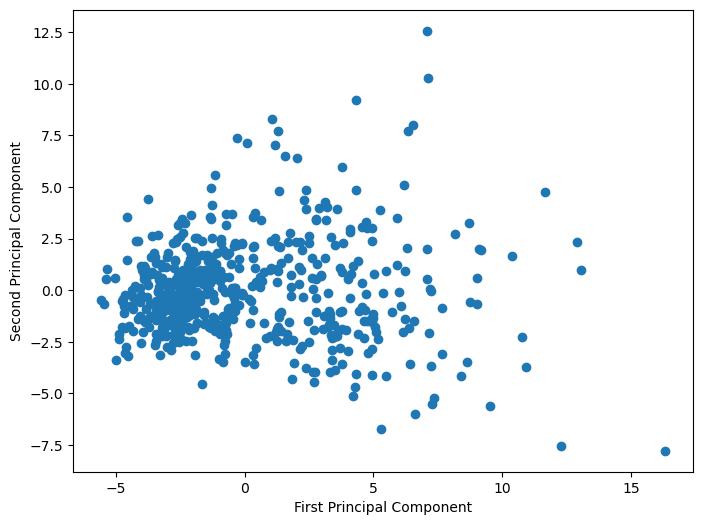

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

This is not ideal. So, to make it more clear, we can use the `target` variable to color the points.

Text(0, 0.5, 'Second Principal Component')

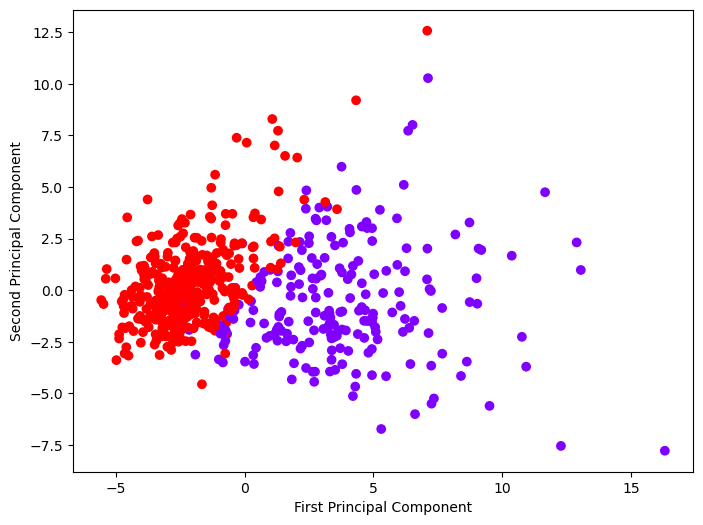

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'], cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

AAANNNDDDD there you go. Now we have a `2-dimensional` representation of the dataset. We can see that the `malignant` and `benign` classes are `separated` from each other. This means that the `2` components are able to `capture` the `variance` in the dataset and are able to `separate` the `2` classes. Which is very good. And this is the power of `PCA`.

So, By this we learned that we don't need to use all the features to visualize the dataset. We can use `PCA` to reduce the number of features and then visualize the dataset in a `2-dimensional space` which is very easy to understand and visualize. WHich can then be used to train any machine learning model.

# Conclusion

In this notebook, I explained the concept of `PCA` and how it works. I also showed how to implement `PCA` using Python and the `scikit-learn` library. I hope you liked this notebook and found it helpful. If you have any questions, feel free to ask in the comments section.


#### Happy Principal Component Analysing!